In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datacompy
import os
import numpy as np

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    learning_curve,
    RepeatedStratifiedKFold,
    GridSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# modele + Smote
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from ctgan import CTGAN

### Data Preprocessing

In [7]:
df = pd.read_csv("D:/ml/xgboost-main/data/android_malware/TUANDROMD.csv")
df.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0   

C:\Users\mateu\AppData\Local\Temp\ipykernel_21116\720787424.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['source'] = 'original'


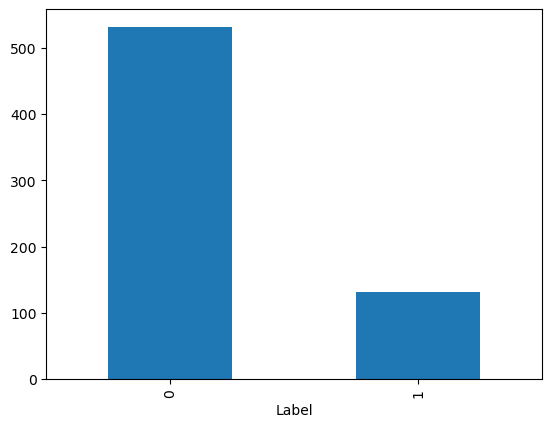

In [20]:
#import dataset
df = pd.read_csv("D:/ml/xgboost-main/data/android_malware/TUANDROMD.csv")
print(df.head())

df = df.drop_duplicates()

df = df.fillna(0) 
label = {'malware':1,'goodware':0}      #zamina tekstu w excel na wartosci 0 i 1
df = df.replace(label)
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).astype('int64')

#stworzenie tabeli stanow oraz tabeli wyjsc
y = df['Label']
X = df.drop(columns=['Label'])

pd.Series(y).value_counts().plot.bar()     #ilosc 1 i 0 klasyfikujacych

#add new column = "source" with value = "oryginal" and save
path = "D:\\ml\\xgboost-main\\data\\android_malware\\oryginal_dataset.csv"
df['source'] = 'original'
df.to_csv(path)

In [21]:
#podział danych
df2 = df.drop(columns="source")
y = df2["Label"]
X = df2.drop(columns=["Label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Datashape:")
print(X_train.shape)
print(X_test.shape)

#concat X_train & y_train -> used to save files
df_original = pd.concat([X_train, y_train], axis=1)          
df_original['source'] = 'oryginal'  

#save test samples
y_test.to_csv("D:\\ml\\xgboost-main\\data\\testframe\\iot\\y_test.csv")
X_test.to_csv("D:\\ml\\xgboost-main\\data\\testframe\\iot\\X_test.csv")  

Datashape:
(530, 241)
(133, 241)


C:\Users\mateu\AppData\Local\Temp\ipykernel_21116\1384464253.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_original['source'] = 'oryginal'


### SMOTE

Przed Counter({1: 2847, 0: 725})
Po Counter({1: 2847, 0: 2847})
(5694, 241)
(5694,)


<Axes: xlabel='Label'>

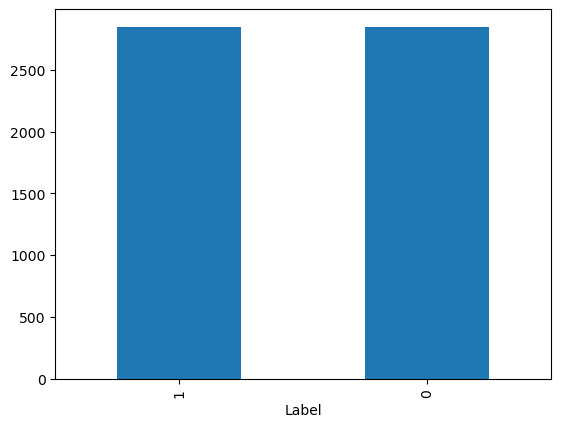

In [36]:
con = Counter(y_train)
print('Przed',con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
con1 = Counter(y_train_sm)
print('Po', con1)
print(X_train_sm.shape)
print(y_train_sm.shape)
pd.Series(y_train_sm).value_counts().plot.bar() 

### BoarderLine SMOTE

In [ ]:
con3 = Counter(y_train)
print("Przed", con3)
brdsmote = BorderlineSMOTE(random_state=42)
X_train_bsm, y_train_bsm = brdsmote.fit_resample(X_train, y_train)
con4 = Counter(y_train_bsm)
print("Po", con4)
pd.Series(y_train_bsm).value_counts().plot.bar()

Unbalanced Cross-Validation Results (Accuracy): [0.97486034 0.96927374 0.9859944  0.97759104 0.98879552 0.98039216
 0.97759104 0.98319328 0.99159664 0.98879552 0.98603352 0.97765363
 0.9859944  0.97759104 0.9859944  0.98039216 0.96638655 0.98879552
 0.97759104 0.9859944  0.98044693 0.98324022 0.9859944  0.98319328
 0.97759104 0.97478992 0.96918768 0.98039216 0.98879552 0.97759104
 0.99162011 0.96648045 0.98039216 0.98039216 0.98319328 0.99439776
 0.9719888  0.9719888  0.97759104 0.98039216 0.98324022 0.99162011
 0.9859944  0.9859944  0.9719888  0.97759104 0.96918768 0.97478992
 0.98879552 0.98039216 0.98044693 0.97765363 0.99159664 0.97478992
 0.98039216 0.98039216 0.98039216 0.97759104 0.98319328 0.98039216
 0.98044693 0.98324022 0.97478992 0.98319328 0.99439776 0.98039216
 0.98879552 0.97478992 0.97478992 0.97478992 0.98603352 0.97765363
 0.97759104 0.98879552 0.98319328 0.98039216 0.97759104 0.97478992
 0.97759104 0.97759104 0.98044693 0.97486034 0.98319328 0.99159664
 0.9719888  0.

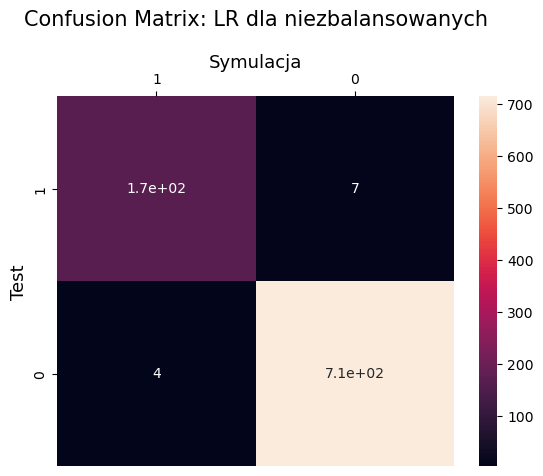

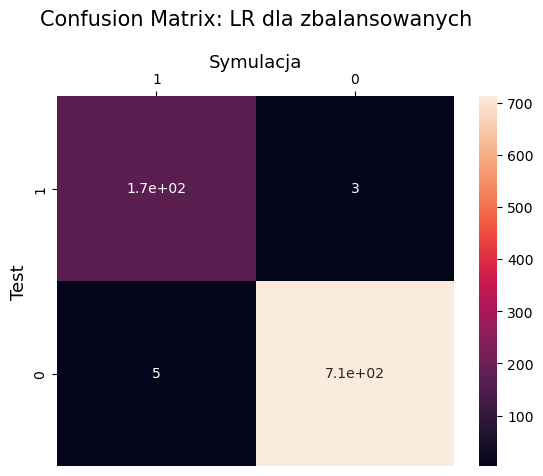

In [46]:
model_LR = LogisticRegression()
model_LR_SMOTE = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
model_LR.fit(X_train,y_train)
model_LR_SMOTE.fit(X_train_sm,y_train_sm)

cross_val_results = cross_val_score(model_LR, X_train, y_train, cv=cv, n_jobs=-1)
print(f'Unbalanced Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Dev: {cross_val_results.std()}')

cross_val_results2 = cross_val_score(model_LR_SMOTE, X_train_sm, y_train_sm, cv=cv, n_jobs=-1)
print(f'Balanced Cross-Validation Results (Accuracy): {cross_val_results2}')
print(f'Mean Accuracy: {cross_val_results2.mean()}')
print(f'Dev: {cross_val_results2.std()}')

#print(model_RF.oob_score_)
#print(model_RF_SMOTE.oob_score_)

print("Score on test set (original data):", model_LR.score(X_test, y_test))
print("Score on test set (original data):", model_LR_SMOTE.score(X_test, y_test))


y_pred_LR = model_LR.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR_SMOTE))
conf_mat_LR = confusion_matrix(y_test,y_pred_LR)
conf_mat_LR_SMOTE = confusion_matrix(y_test,y_pred_LR_SMOTE)
conf_matrices = [conf_mat_LR, conf_mat_LR_SMOTE]
model_names = ['LR dla niezbalansowanych', 'LR dla zbalansowanych']
for conf_mat, model_name in zip(conf_matrices,model_names):
    sns.heatmap(conf_mat, annot=True,xticklabels=['1','0'],yticklabels=['1','0'])
    plt.ylabel('Test',fontsize=13)
    plt.title(f'Confusion Matrix: {model_name}', fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('Symulacja',fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.show()

In [11]:
model_LR = LogisticRegression()                         #LR dla nie zbalansowanych         
model_LR_SMOTE = LogisticRegression()                   #LR dla zbalansowanych
model_RF = RandomForestClassifier(                      #random forest dla nie zbalansowanych
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42,          
    bootstrap=True
    )                     
model_RF_SMOTE = RandomForestClassifier(                      #random forest dla zbalansowanych
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42,          
    bootstrap=True
    )   
model_DT = DecisionTreeClassifier()                     #decision tree dla nie zbalansowanych
model_DT_SMOTE = DecisionTreeClassifier()               #decision tree dla zbalansowanych


model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm,y_train_sm)
model_RF.fit(X_train,y_train)
model_RF_SMOTE.fit(X_train_sm,y_train_sm)
model_DT.fit(X_train,y_train)
model_DT_SMOTE.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

## Markery:
Accuracy – Accuracy jest użyteczna, gdy klasy są zrównoważone. W przypadku niezrównoważonych danych może być jednak myląca, ponieważ model może osiągnąć wysoką dokładność, pomijając mniejszościowe klasy.

Recall –  Wysoki recall oznacza, że model dobrze wykrywa wszystkie rzeczywiste pozytywne przypadki i rzadko pomija rzeczywiste przypadki pozytywne.

Precision – Wysoka precyzja oznacza, że model rzadko daje fałszywe alarmy (czyli błędnie klasyfikuje negatywne przypadki jako pozytywne).

F1 score - F1-score jest wysoki, gdy zarówno precision, jak i recall są wysokie. Jest to dobra metryka, gdy ważne jest, aby balansować dokładność z wykrywalnością pozytywnych przypadków.

Micro avg - Micro average traktuje wszystkie klasy tak samo i jest odpowiednia, gdy chcesz dać taki sam priorytet każdemu przypadkowi, bez względu na jego klasę.

Weighted avg - Weighted average jest przydatna, gdy dane są niezrównoważone, ponieważ uwzględnia liczbę przypadków każdej klasy. Daje lepsze ogólne zrozumienie wydajności modelu na zestawach danych z nierównomiernym rozkładem klas.


In [ ]:

#LR
y_pred_LR = model_LR.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR_SMOTE))

#RF
y_pred_RF = model_RF.predict(X_test)
print('RF dla nie zbalansowanych\n', classification_report(y_test, y_pred_RF))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print('RF dla zbalansowanych\n', classification_report(y_test, y_pred_RF_SMOTE))

#DT
y_pred_DT = model_DT.predict(X_test)
print('DT dla nie zbalansowanych\n', classification_report(y_test, y_pred_DT))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print('DT dla zbalansowanych\n', classification_report(y_test, y_pred_DT_SMOTE))



LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       183
           1       0.99      0.99      0.99       710

    accuracy                           0.98       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.98      0.98      0.98       893

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       183
           1       0.99      0.99      0.99       710

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893

RF dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       183
           1       1.00      0.99      0.99       710

    accuracy                           0.99       893
   macro avg       0.98      0.99      0.98    

## Drzewa decyzyjne

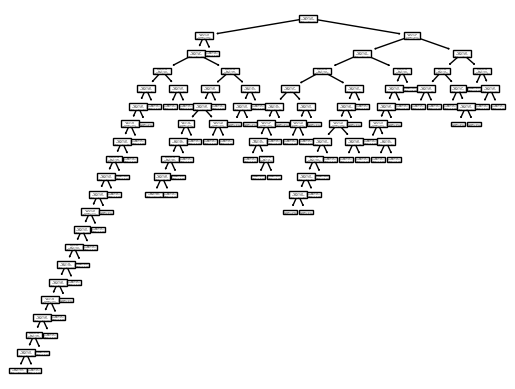

|--- feature_149 <= 0.50
|   |--- feature_228 <= 0.50
|   |   |--- feature_216 <= 0.50
|   |   |   |--- feature_209 <= 0.50
|   |   |   |   |--- feature_200 <= 0.50
|   |   |   |   |   |--- feature_237 <= 0.50
|   |   |   |   |   |   |--- feature_98 <= 0.50
|   |   |   |   |   |   |   |--- feature_215 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_190 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_214 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_125 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_125 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_214 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_190 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_215 >  0.50
|   |   |   |   |   |   |   | 

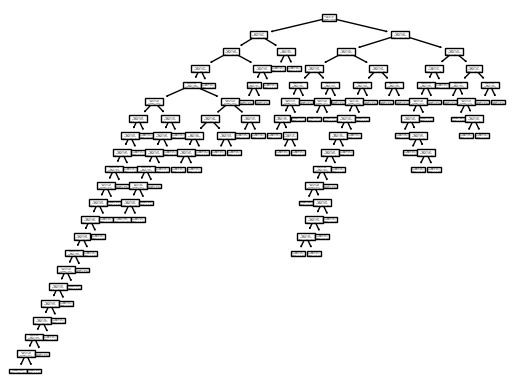

|--- feature_149 <= 0.50
|   |--- feature_209 <= 0.50
|   |   |--- feature_182 <= 0.50
|   |   |   |--- feature_154 <= 0.50
|   |   |   |   |--- feature_98 <= 0.50
|   |   |   |   |   |--- feature_216 <= 0.50
|   |   |   |   |   |   |--- feature_236 <= 0.50
|   |   |   |   |   |   |   |--- feature_215 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_190 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_200 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_214 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_214 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_200 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_190 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_215 >  0.50
|   |   |   |   |   |   |   | 

In [ ]:
tree.plot_tree(model_DT, proportion=True)
tree_text = tree.export_text(model_DT)
plt.show()
print(tree_text)
tree.plot_tree(model_DT_SMOTE, proportion=True)
tree_text2 = tree.export_text(model_DT_SMOTE)
plt.show()
print(tree_text2)